In [0]:
%matplotlib inline

Automatically created module for IPython interactive environment
Resultados que proporcionó el clasificador para nuestros datos de validación
[2 1 0 2 0 2 0 2 2 1 2 2 1 2 2 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]
Resultados reales para nuestros datos de validación
[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 1]
Matriz de confusion sin normalizar
[[13  0  0]
 [ 0 10  6]
 [ 0  0  9]]
Matriz de confusion normalizada
[[1.   0.   0.  ]
 [0.   0.62 0.38]
 [0.   0.   1.  ]]


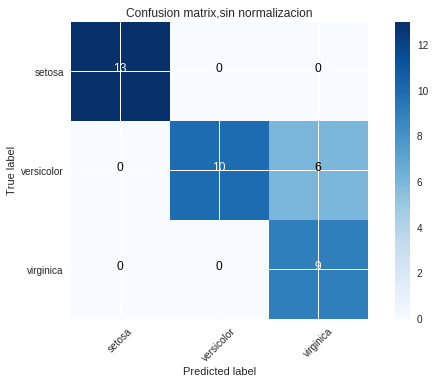

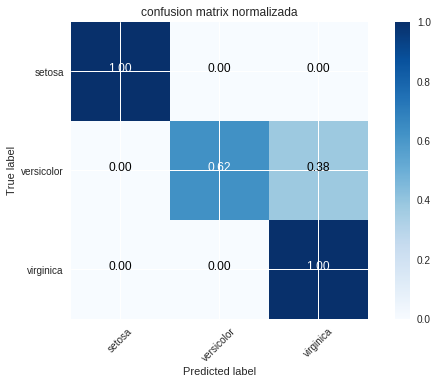

In [2]:
print(__doc__)

import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# dataset de pruebas
iris = datasets.load_iris()
X = iris.data
y = iris.target
class_names = iris.target_names

# dividimos los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# ejecutamos el clasificador
classifier = svm.SVC(kernel='linear', C=0.01)
y_pred = classifier.fit(X_train, y_train).predict(X_test)


print("Resultados que proporcionó el clasificador para nuestros datos de validación")
print(y_pred)
print("Resultados reales para nuestros datos de validación")
print(y_test)


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Matriz de confusion',
                          cmap=plt.cm.Blues):

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Matriz de confusion normalizada")
    else:
        print('Matriz de confusion sin normalizar')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()



cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)


plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix,sin normalizacion')


plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='confusion matrix normalizada')

plt.show()